In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [68]:
def display(originImage, transformedImage, title):
   plt.figure(figsize=(10, 5))
      # Low-light Image
   plt.subplot(1, 2, 1)
   plt.imshow(originImage, cmap='gray')
   plt.title('Low-Light Image')
   plt.axis('off')

   # Brightened Image
   plt.subplot(1, 2, 2)
   plt.imshow(transformedImage, cmap='gray')
   plt.title('Brightened Image')
   plt.axis('off')
   plt.suptitle(title)

   plt.show()

# Linear gray transformation

$g(m,n) = k[f(m,n) - a] + c$

in which, $(m, n)$ determines the coordinates of the pixels, and $k= \frac{d-c}{b-a}$ is the slope of the transformation function.

1. Dynamic range extension (k > 1): improving the problem of insufficient image exposure
2. Dynamic range reduction (k < 1): as experiment, the image will brighter
3. Reverse (k < 0): the light parts will darker and dark parts will brighter

In [69]:
def linearTransformed(image,c, d):
    # Apply linear gray level transformation
    a = np.min(image)
    b = np.max(image)
    k = (d - c) / (b - a)
    print(f"a={a}, b={b}, c={c}, d={d}")
    print(f"k={k}")
    transformed_image = (image - a) * k + c
    transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)
    return transformed_image

# Piece - wise linear gray level transformation

$
g(m,n)=
\begin{cases}
a & \text{if } f(m,n)<a \\
c + k[f(m, n) - a] & \text{if } a\leq f(m,n) \leq b \\
b & \text{if } f(m,n)<b
\end{cases}
$




In [93]:
def piecewiseTransformed(image, c, d):
    a = np.min(image)
    b = np.max(image)
    k = (d - c) / (b - a)
    transformed_image = np.zeros_like(image, dtype=np.float32)

    for channel in range(image.shape[2]):
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                pixel_value = image[i, j, channel]
                if pixel_value < a:
                    transformed_image[i, j, channel] = a
                elif a <= pixel_value <= b:
                    transformed_image[i, j, channel] = c + k * (pixel_value - a)
                else:
                    transformed_image[i, j, channel] = b

    transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)
    return transformed_image


# Logarithm Transformation

$g(m, n) = \lambda log_{v + 1} (1 + v . f(m, n))$ #k duoc

$g(m, n) = \lambda log_{10} (1 + h(m, n))$

Logarithmic transformation of an image means replacing all pixel values present in the 
image with its logarithmic values.


In [89]:
def logarithmTransformed(image, ld = 70, lg=10):
    # transformed_image = ld * np.log(1 + image_gray) / np.log(lg)
    transformed_image = ld * np.log10(1 + image) 
    transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)
    # transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_GRAY2RGB)
    return transformed_image
    

# Gamma Transformation

$g(m, n) = \lambda (f(m, n) + \epsilon)^\gamma$

$g(m, n) = \lambda . f(m, n)^\gamma$

- if $\gamma < 1 \rightarrow$ gray value map to hight brightness
- elif $\gamma > 1 \rightarrow$ gray value map to low brightness


In [97]:
def gammaTransformed(image, ld = 25, ep=1, gam = 0.5):
    transformed_image = ld * (image + ep)**gam 
    transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)
    return transformed_image

In [95]:
def run(imagePath):
    image = cv2.imread(imagePath) 
    # After experiments and found the best c d 
    c = 60
    d = 240
    while True:
        ip = input("1: linear, 2: piece-wise, 3: Logarithm, 4: Gamma, 5: quit")
        if ip == '1':
            f = linearTransformed
        elif ip == '2':
            f = piecewiseTransformed
        elif ip == '3':
            f = logarithmTransformed
        elif ip == '4':
            f = gammaTransformed
        elif ip == '5':
            break
        else:
            print("wrong ip")
            continue
        
        if ip == '1' or ip == '2':
            if ip == '1': title = "Linear Transformation"
            elif ip == '2': title = "Piece-wise Transformation"

            transformed_image = f(image, c, d)
            display(image, transformed_image, title)
            while True:
                key = input("'c' change c or d, 'r' reset, or 'q' quit: ")
                if key == 'q':
                    break
                elif key == 'r':
                    c = 60
                    d = 240
                else:
                    c = int(input("c?"))
                    d = int(input("d?"))
                transformed_image = f(image, c, d)
            
                display(image, transformed_image, title)

        elif ip == '3' or  ip == '4':
            if ip == '3': title = "Logarithm Transformation"
            elif ip == '4': title = "Gamma Transformation"
            transformed_image = f(image)
            display(image, transformed_image, title)
            if ip == '3':  # Logarithm
                while True:
                    key = input("'c' change ld, 'r' reset, 'q' quit")
                    if key == 'q':
                        break
                    elif key == 'r':
                        ld = 70
                    else:
                        ld = int(input("ld?"))
                    transImg = f(image,ld=ld)
                    display(image, transImg, title)
            if ip == '4':  # Gamma
                while True:
                    key = input("'c' change ld or gam, 'r' reset, 'q' quit")
                    if key == 'q':
                        break
                    elif key == 'r':
                        ld = 25
                        gam = 0.5
                    else:
                        ld = int(input("ld?"))
                        gam = float(input("gam?"))
                    transImg = f(image,ld=ld, gam=gam)    
                    display(image, transImg, title) 
        

a=0, b=255, c=60, d=240
k=0.7058823529411765


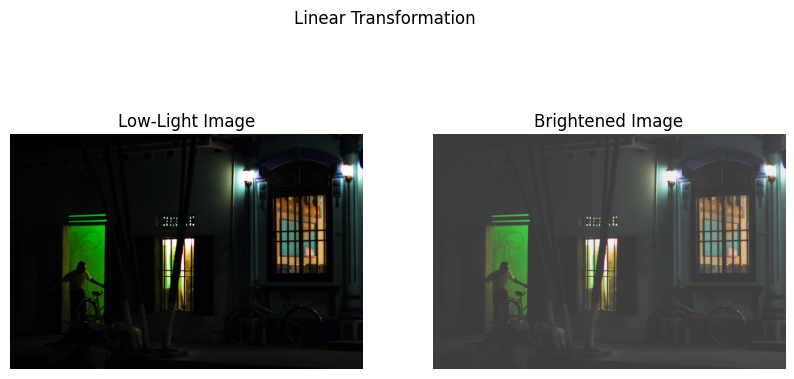

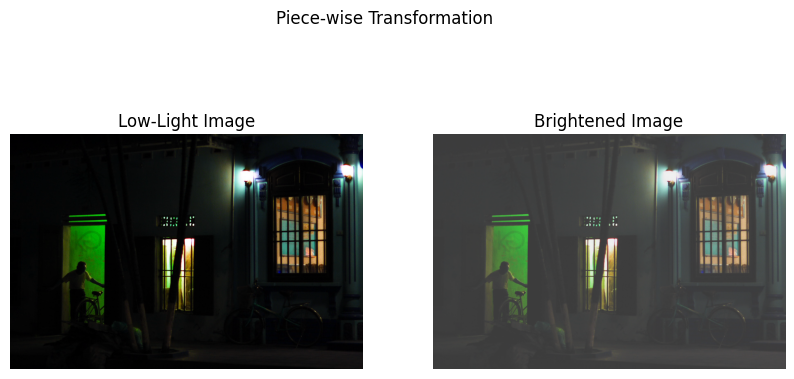

C:\Users\thuyl\AppData\Local\Temp\ipykernel_13744\3274056533.py:3: RuntimeWarning: divide by zero encountered in log10
  transformed_image = ld * np.log10(1 + image)


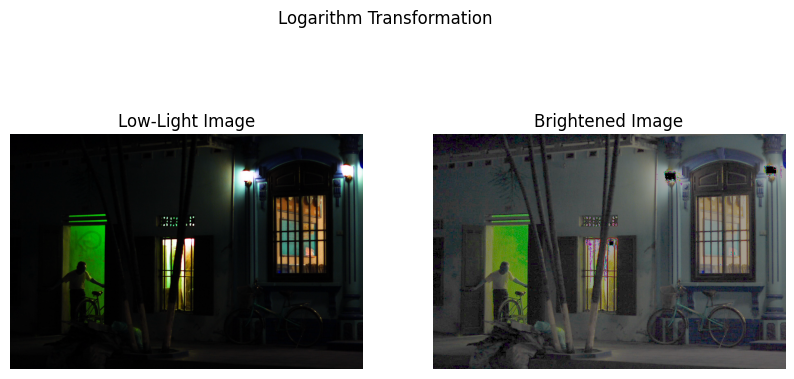

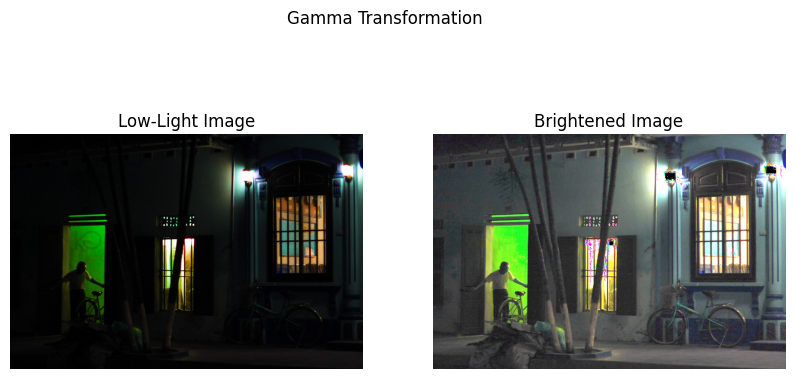

In [94]:
run(r'C:\Users\thuyl\OneDrive\My documents\CS231_Computer-Vision\test.jpg')